In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [3]:
# Load the data
data = pd.read_csv(r"letter-recognition.data", header=None)

# Preprocess the data
X = data.iloc[:, 1:]
y = data.iloc[:, 0]

# Convert labels to numerical values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

data.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import History
# Build the DNN Model
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(len(np.unique(y)), activation='softmax'))  # Output layer with softmax for multiclass classification

# Compile the Model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the Model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

2024-04-21 09:56:04.155585: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-21 09:56:04.287498: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-12.4/lib64
2024-04-21 09:56:04.287513: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-04-21 09:56:04.311769: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-21 09:56:06.704

Epoch 1/10


2024-04-21 09:56:10.412208: E tensorflow/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2024-04-21 09:56:10.412230: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (pushkar-Nitro-AN515-54): /proc/driver/nvidia/version does not exist
2024-04-21 09:56:10.412552: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


400/400 [==============================] - 3s 2ms/step - loss: 1.5355 - accuracy: 0.5909 - val_loss: 0.8990 - val_accuracy: 0.7484
Epoch 2/10
400/400 [==============================] - 0s 1ms/step - loss: 0.7252 - accuracy: 0.7934 - val_loss: 0.6394 - val_accuracy: 0.8156
Epoch 3/10
400/400 [==============================] - 0s 1ms/step - loss: 0.5530 - accuracy: 0.8399 - val_loss: 0.5140 - val_accuracy: 0.8531
Epoch 4/10
400/400 [==============================] - 0s 1ms/step - loss: 0.4498 - accuracy: 0.8673 - val_loss: 0.4412 - val_accuracy: 0.8666
Epoch 5/10
400/400 [==============================] - 0s 1ms/step - loss: 0.3825 - accuracy: 0.8874 - val_loss: 0.3867 - val_accuracy: 0.8878
Epoch 6/10
400/400 [==============================] - 1s 1ms/step - loss: 0.3307 - accuracy: 0.9027 - val_loss: 0.3383 - val_accuracy: 0.9019
Epoch 7/10
400/400 [==============================] - 0s 1ms/step - loss: 0.2903 - accuracy: 0.9140 - val_loss: 0.3272 - val_accuracy: 0.8991
Epoch 8/10
400/40

125/125 [==============================] - 0s 692us/step - loss: 0.2387 - accuracy: 0.9295
Test Loss: 0.2387, Test Accuracy: 0.9295


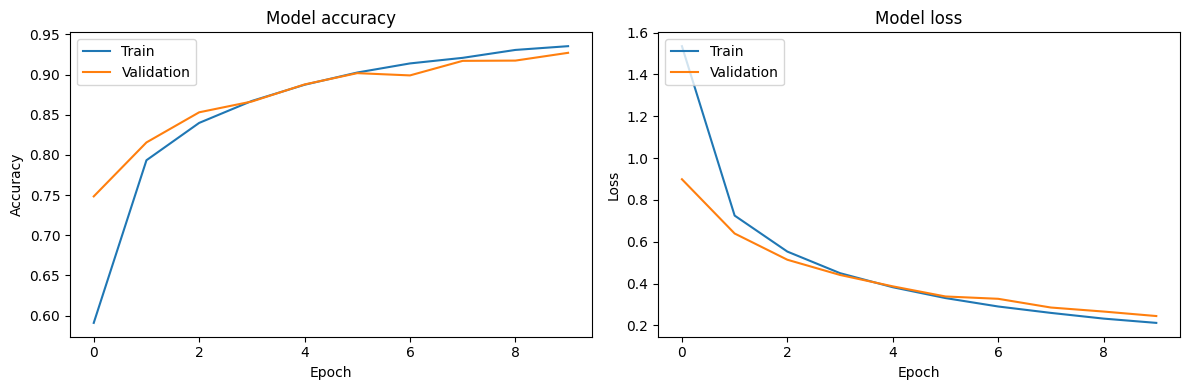

In [6]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')

# Plot training history
def plot_history(history):
    plt.figure(figsize=(12, 4))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()

# Plot the history
plot_history(history)

In [24]:

# Given data
import numpy as np
new_data = np.array([12,14,12,8,5,9,10,4,3,5,10,7,10,12,2,6]).reshape(1, -1)

# Use the model to make predictions
predictions = model.predict(new_data)
print(predictions)
# Display the predictions
predicted_class = np.argmax(predictions)
print(f'The predicted class is: {predicted_class}')

1/1 [==============================] - 0s 22ms/step
[[2.0522401e-15 0.0000000e+00 7.1188852e-02 0.0000000e+00 1.1556804e-17
  3.7659502e-28 6.6162588e-28 9.2881113e-01 0.0000000e+00 2.1436421e-32
  1.1437029e-25 3.0538958e-18 1.1418987e-24 2.0627634e-32 2.7051158e-11
  0.0000000e+00 1.1609158e-18 0.0000000e+00 1.7260933e-12 1.9182604e-24
  6.9244486e-28 8.9869124e-22 3.8590962e-36 8.5249495e-29 0.0000000e+00
  0.0000000e+00]]
The predicted class is: 7


In [25]:
class_mapping = {
    0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J',
    10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S', 19: 'T',
    20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z'
}

# Display the predicted class using the mapping
predicted_letter = class_mapping[predicted_class]
print(f'The predicted class is: {predicted_class}, which corresponds to the letter: {predicted_letter}')

The predicted class is: 7, which corresponds to the letter: H


In [22]:
import tkinter as tk

In [26]:
def predict_letter():
    # Retrieve input data from entry widget
    input_data = entry.get()
    # Convert input data to numpy array
    try:
        new_data = np.array(list(map(int, input_data.split())))
        # Check if the input size matches the expected size
        if new_data.shape == (16,):
            # Add a batch dimension
            new_data = new_data.reshape(1, -1)
            # Use the model to make predictions
            predictions = model.predict(new_data)
            # Display the predictions
            predicted_class = np.argmax(predictions)
            predicted_letter = class_mapping.get(predicted_class, 'Unknown')
            # Display predicted Letter
            messagebox.showinfo("Prediction Result", f"The predicted letter is: {predicted_letter}")
        else:
            messagebox.showerror("Error", "Invalid input size. Please enter 16 space-separated integers.")
    except ValueError:
        messagebox.showerror("Error", "Invalid input data. Please enter space-separated integers.")